In [42]:
import pandas as pd
import torch

# read csv into a dataframe
df = pd.read_csv('Clean_Dataset.csv') 
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Visualizing Dataset

In [29]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [30]:
df.source_city.value_counts(), df.destination_city.value_counts()


(source_city
 Delhi        61343
 Mumbai       60896
 Bangalore    52061
 Kolkata      46347
 Hyderabad    40806
 Chennai      38700
 Name: count, dtype: int64,
 destination_city
 Mumbai       59097
 Delhi        57360
 Bangalore    51068
 Kolkata      49534
 Hyderabad    42726
 Chennai      40368
 Name: count, dtype: int64)

In [31]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [32]:
df['class'].value_counts() # can binary encode

class
Economy     206666
Business     93487
Name: count, dtype: int64

### Processing Data

In [33]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

# binary encoding for class
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [34]:
df.stops = pd.factorize(df.stops)[0]

In [35]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [36]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


### Training Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('price', axis=1), df.price

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
regression = RandomForestRegressor()
regression.fit(X_train, y_train)

RandomForestRegressor()

### Evaluating Model

In [40]:
# r^2 value
regression.score(X_test, y_test)

0.9853836807571839

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math 

y_pred = regression.predict(X_test)

print('r^2:', r2_score(y_test, y_pred))
print('mean absolute error', mean_absolute_error(y_test, y_pred))
print('mean squared error', mean_squared_error(y_test, y_pred))
print('mean squared error', math.sqrt(mean_squared_error(y_test, y_pred)))



r^2: 0.9853836807571839
mean absolute error 1068.1224927843498
mean squared error 7509843.05838579
mean squared error 2740.4092866551505


Text(0.5, 1.0, 'prediction vs actual price')

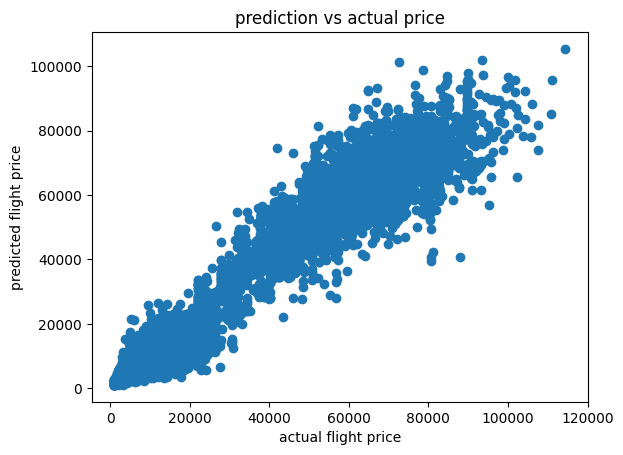

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('actual flight price')
plt.ylabel('predicted flight price')
plt.title('prediction vs actual price')

In [16]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

### Tuning Model

In [17]:
# find features that affect the price the most
importances = dict(zip(regression.feature_names_in_, regression.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8797526016337223),
 ('duration', 0.05766640273741496),
 ('days_left', 0.018443394257095867),
 ('airline_Air_India', 0.0054206360348143185),
 ('airline_Vistara', 0.004531546044928407),
 ('source_Delhi', 0.0037145589337776496),
 ('dest_Delhi', 0.0034316809656463588),
 ('source_Mumbai', 0.002258418500262957),
 ('dest_Mumbai', 0.0019243778657911394),
 ('dest_Kolkata', 0.0018080742803787467),
 ('stops', 0.0017889075253315484),
 ('source_Kolkata', 0.001777242242657204),
 ('dest_Hyderabad', 0.001617441084682767),
 ('arrival_Evening', 0.0015977800263176425),
 ('source_Hyderabad', 0.0012926626533618657),
 ('dest_Bangalore', 0.0012138419418824208),
 ('arrival_Night', 0.0012080216548664203),
 ('departure_Evening', 0.00107881517216336),
 ('arrival_Afternoon', 0.0010497890302161087),
 ('source_Bangalore', 0.0010404564867390702),
 ('source_Chennai', 0.0009313203961040708),
 ('departure_Morning', 0.0009027527515799677),
 ('dest_Chennai', 0.0008700872038373297),
 ('departure_Early_Morning

In [18]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

regression = RandomForestRegressor(n_jobs=1)

random_search = RandomizedSearchCV(estimator=regression, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 2.8min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 2.8min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 2.9min


/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/code

In [21]:
best_regressor.score(X_test, y_test)

0.9866462109364992

In [27]:
y_pred = best_regressor.predict(X_test)

print('r^2:', r2_score(y_test, y_pred))
print('mean absolute error', mean_absolute_error(y_test, y_pred))
print('mean squared error', mean_squared_error(y_test, y_pred))
print('mean squared error', math.sqrt(mean_squared_error(y_test, y_pred)))

r^2: 0.9866462109364992
mean absolute error 1076.4123680460364
mean squared error 6870048.915830038
mean squared error 2621.0778156762226


### Saving Model

In [45]:
import pickle
from sklearn import svm
from sklearn import datasets

filename = 'model_0.sav'
pickle.dump(regression, open(filename, 'wb'))


In [48]:
loaded_model = pickle.load(open('model_0.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9853836807571839
